In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0.0, 100, 11)

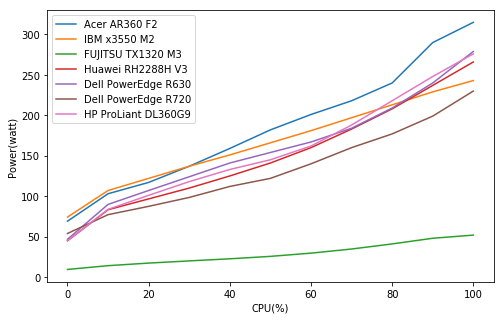

In [3]:
orig = pd.read_csv('./data.csv', sep='\t')
df = orig
df['cpu'] = x
df = df.set_index('cpu')
ax = df.plot(figsize=(8,5))
ax.set_xlabel('CPU(%)')
ax.set_ylabel('Power(watt)')
fig = ax.get_figure()
fig.savefig('fig4_3.png', dpi=600)

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [7]:

name = ['DSCS', 'FFHS', 'LFHS', 'WEEC']
x= np.arange(len(name))

# OL

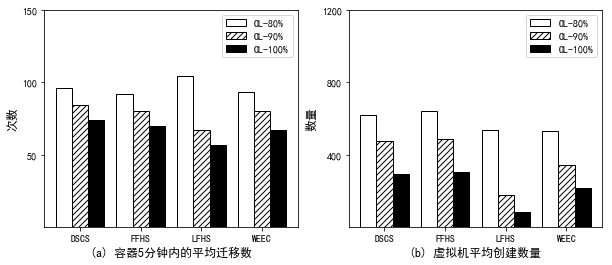

In [317]:
# average of migration
OL_80 = np.array([96, 92, 104, 93])
OL_90 = np.array([84, 80, 67, 80])
OL_100 = np.array([74, 70, 57, 67])
plt.figure(figsize=(10,4))
total_width, n = 0.8, 3
width = total_width / n
plt.subplot(121)
plt.bar(x, OL_80,  width=width, label='OL-80%', color='white', ls='-', ec='black')
plt.bar(x + width, OL_90, width=width, label='OL-90%', tick_label = name, color='white', ls='-', ec='black', hatch='////')
plt.bar(x + 2 * width, OL_100, width=width, label='OL-100%', color='black', ls='-', ec='black')
plt.yticks([50,100,150])
plt.legend(loc='upper right')
plt.ylabel('次数', fontsize=12)
plt.xlabel('(a) 容器5分钟内的平均迁移数', fontsize=12)

# average of vm create
OL_80 = np.array([621, 642, 537, 531])
OL_90 = np.array([474, 485, 180, 342])
OL_100 = np.array([295, 306, 86, 216])
total_width, n = 0.8, 3
width = total_width / n
plt.subplot(122)
plt.bar(x, OL_80,  width=width, label='OL-80%', color='white', ls='-', ec='black')
plt.bar(x + width, OL_90, width=width, label='OL-90%', tick_label = name, color='white', ls='-', ec='black', hatch='////')
plt.bar(x + 2 * width, OL_100, width=width, label='OL-100%', color='black', ls='-', ec='black')
plt.yticks([400, 800, 1200])
plt.legend(loc='upper right')
plt.ylabel('数量', fontsize=12)
plt.xlabel('(b) 虚拟机平均创建数量', fontsize=12)
plt.savefig('fig4_4-1', dpi=600)

In [10]:
def get_data(a, b):
    x = int((30 - len(b))/4)
    data = b
    for i in range(4):
        data = np.append(data, np.random.randint(b[i], b[i+1], x))
    data = np.append(data, a)
    return np.sort(data)

random = np.random.RandomState(0)
def get_data2(a, b):
    x = int((30 - len(b))/4)
    data = b
    for i in range(4):
        data = np.append(data, [random.uniform(b[i], b[i+1]) for j in range(x)])
    data = np.append(data, a)
    return np.sort(data)

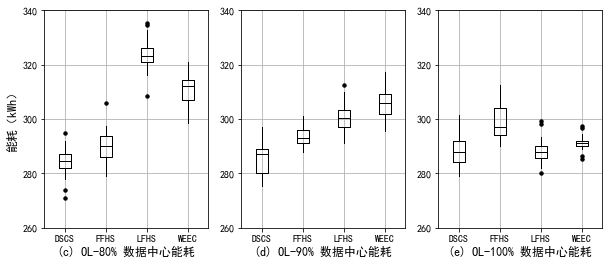

In [324]:
# 80
data1 = get_data(np.array([274,271,295]), np.array([278,283,285,287,292]))
data2 = get_data(np.array([306]), np.array([279,286.5,290.4,293,297.5]))
data3 = get_data(np.array([308.3,332.6,334.4,335.3]), np.array([316.4,320.9,323.6,325.4,328.1]))
data4 = get_data(np.array([]), np.array([298.65,307.2,312.6,314.4,320.9]))
plt.figure(figsize=(10,4))
ax = plt.subplot(131)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([260, 280, 300, 320, 340])
plt.grid()
plt.ylabel('能耗（kWh）', fontsize=12)
plt.xlabel('(c) OL-80% 数据中心能耗', fontsize=12)

# 90
data1 = get_data(np.array([]), np.array([275.5,280,287.6,289.9,297.1]))
data2 = get_data(np.array([]), np.array([288.3,291,293.7,296.4,300.9]))
data3 = get_data(np.array([312.6]), np.array([291.9,297.3,300.9,303.6,309.9]))
data4 = get_data(np.array([]), np.array([295.5,302.7,306.3,309,317.1]))
ax = plt.subplot(132)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([260, 280, 300, 320, 340])
plt.grid()
plt.xlabel('(d) OL-90% 数据中心能耗', fontsize=12)

# 100
data1 = get_data(np.array([]), np.array([279.1,284.5,288.1,292.6,301.5]))
data2 = get_data(np.array([312.6]), np.array([290.1,294.6,297.3,301.8,309.9]))
data3 = get_data(np.array([280,299.3,298.2]), np.array([282.7,286.3,288.1,289.9,293.5]))
data4 = get_data(np.array([285.3,286.2,296.65,297.28]), np.array([289.9, 290.8,291.7,292.6,294.4]))
ax = plt.subplot(133)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([260, 280, 300, 320, 340])
plt.grid()
plt.xlabel('(e) OL-100% 数据中心能耗', fontsize=12)

plt.savefig('fig4_4-2', dpi=600)

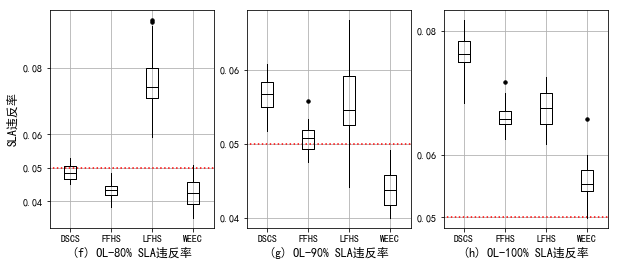

In [350]:
# 80
data1 = get_data2(np.array([]), np.array([0.0450,0.0467,0.0483,0.0504,0.0529]))
data2 = get_data2(np.array([0.0483]), np.array([0.0383,0.0417,0.0433,0.0442,0.0471]))
data3 = get_data2(np.array([]), np.array([0.0592,0.0708,0.0742,0.08,0.0942]))
data4 = get_data2(np.array([]), np.array([0.0350,0.0392,0.0425,0.0458,0.0508]))
plt.figure(figsize=(10,4))
ax = plt.subplot(131)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.4, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([0.04,0.05,0.06,0.08])
plt.grid()
plt.hlines(0.05, 0, 5, colors = "red", linestyles = ":")
plt.ylabel('SLA违反率', fontsize=12)
plt.xlabel('(f) OL-80% SLA违反率', fontsize=12)

# 90
data1 = get_data2(np.array([]), np.array([0.0517,0.055,0.0567,0.0583,0.0608]))
data2 = get_data2(np.array([0.05583]), np.array([0.0475,0.0492,0.0508,0.0517,0.0533]))
data3 = get_data2(np.array([]), np.array([0.0442,0.0525,0.0546,0.0592,0.0667]))
data4 = get_data2(np.array([]), np.array([0.04,0.0417,0.0438,0.0458,0.0492]))
ax = plt.subplot(132)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([0.04,0.05,0.06,0.08])
plt.grid()
plt.hlines(0.05, 0, 5, colors = "red", linestyles = ":")
plt.xlabel('(g) OL-90% SLA违反率', fontsize=12)

# 100
data1 = get_data2(np.array([0.0683]), np.array([0.0725,0.075,0.07625,0.07833,0.08167]))
data2 = get_data2(np.array([0.0717]), np.array([0.0625,0.065,0.0658,0.0660,0.0699]))
data3 = get_data2(np.array([]), np.array([0.0617,0.065,0.0675,0.0699,0.0725]))
data4 = get_data2(np.array([0.06583]), np.array([0.0499,0.0542,0.0554,0.0575,0.06]))
ax = plt.subplot(133)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=2.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([0.05,0.06,0.08,0.09])
plt.grid()
plt.hlines(0.05, 0, 5, colors = "red", linestyles = ":")
plt.xlabel('(h) OL-100% SLA违反率', fontsize=12)

plt.savefig('fig4_4-3', dpi=600)

# UL

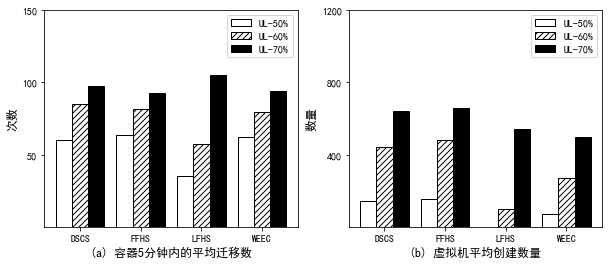

In [351]:
# average of migration
OL_80 = np.array([60, 63.75, 35, 62.5])
OL_90 = np.array([85,81.25,57.5,79.5])
OL_100 = np.array([97.5,92.5,105,93.75])
plt.figure(figsize=(10,4))
total_width, n = 0.8, 3
width = total_width / n
plt.subplot(121)
plt.bar(x, OL_80,  width=width, label='UL-50%', color='white', ls='-', ec='black')
plt.bar(x + width, OL_90, width=width, label='UL-60%', tick_label = name, color='white', ls='-', ec='black', hatch='////')
plt.bar(x + 2 * width, OL_100, width=width, label='UL-70%', color='black', ls='-', ec='black')
plt.yticks([50,100,150])
plt.legend(loc='upper right')
plt.ylabel('次数', fontsize=12)
plt.xlabel('(a) 容器5分钟内的平均迁移数', fontsize=12)

# average of vm create
OL_80 = np.array([142.86,157.14,0,71.43])
OL_90 = np.array([442.86,478.57,100,271.43])
OL_100 = np.array([642.86,657.14,542.86,500])
total_width, n = 0.8, 3
width = total_width / n
plt.subplot(122)
plt.bar(x, OL_80,  width=width, label='UL-50%', color='white', ls='-', ec='black')
plt.bar(x + width, OL_90, width=width, label='UL-60%', tick_label = name, color='white', ls='-', ec='black', hatch='////')
plt.bar(x + 2 * width, OL_100, width=width, label='UL-70%', color='black', ls='-', ec='black')
plt.yticks([400, 800, 1200])
plt.legend(loc='upper right')
plt.ylabel('数量', fontsize=12)
plt.xlabel('(b) 虚拟机平均创建数量', fontsize=12)
plt.savefig('fig4_5-1', dpi=600)

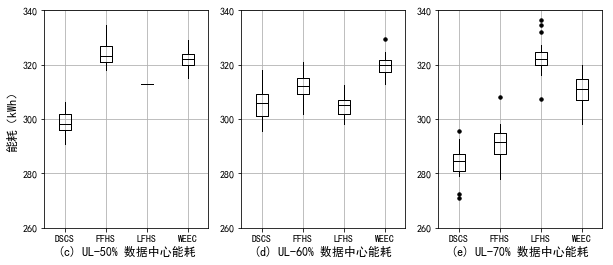

In [353]:
# 50
data1 = get_data(np.array([]), np.array([290.91,296.36,298.18,301.82,306.36]))
data2 = get_data(np.array([]), np.array([318.36,321.36,323.18,327.27,334.73]))
data3 = np.array([312.72 for i in range(30)])
data4 = get_data(np.array([]), np.array([315,320.45,322.73,324.55,329.09]))
plt.figure(figsize=(10,4))
ax = plt.subplot(131)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([260, 280, 300, 320, 340])
plt.grid()
plt.ylabel('能耗（kWh）', fontsize=12)
plt.xlabel('(c) UL-50% 数据中心能耗', fontsize=12)

# 60
data1 = get_data(np.array([]), np.array([295.4,301.82,305.91,309.09,318.18]))
data2 = get_data(np.array([]), np.array([302.73,309.55,312.73,315.45,320.91]))
data3 = get_data(np.array([312.6]), np.array([298.18,302.27,305,307.45,310]))
data4 = get_data(np.array([329.55]), np.array([313.82,317.73,320.45,321.82,324.55]))
ax = plt.subplot(132)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([260, 280, 300, 320, 340])
plt.grid()
plt.xlabel('(d) UL-60% 数据中心能耗', fontsize=12)

# 70
data1 = get_data(np.array([270.82,272.55,295.45]), np.array([279.09,282.73,285,287.27,292.73]))
data2 = get_data(np.array([308.18]), np.array([278.18,287.73,291.82,295.45,298.18]))
data3 = get_data(np.array([307.27,331.82,334.55,336.36]), np.array([316.36,320.91,322.27,324.55,327.27]))
data4 = get_data(np.array([]), np.array([298.18,307.27,311.36,314.55,320]))
ax = plt.subplot(133)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([260, 280, 300, 320, 340])
plt.grid()
plt.xlabel('(e) UL-70% 数据中心能耗', fontsize=12)

plt.savefig('fig4_5-2', dpi=600)

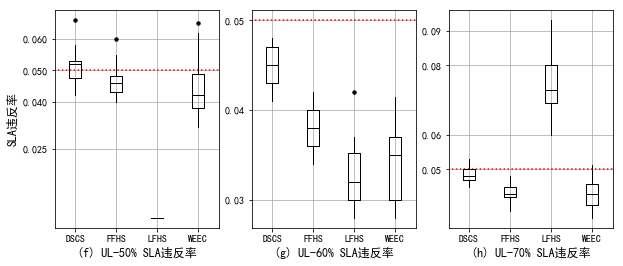

In [354]:
# 80
data1 = get_data2(np.array([0.066]), np.array([0.042,0.047,0.052,0.053,0.058]))
data2 = get_data2(np.array([0.06]), np.array([0.04,0.043,0.046,0.048,0.055]))
data3 = np.array([0.003 for i in range(30)])
data4 = get_data2(np.array([0.062,0.065]), np.array([0.032,0.038,0.042,0.048,0.058]))
plt.figure(figsize=(10,4))
ax = plt.subplot(131)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.4, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([0.025, 0.04, 0.05, 0.06, 0.07])
plt.grid()
plt.hlines(0.05, 0, 5, colors = "red", linestyles = ":")
plt.ylabel('SLA违反率', fontsize=12)
plt.xlabel('(f) UL-50% SLA违反率', fontsize=12)

# 90
data1 = get_data2(np.array([]), np.array([0.041,0.043,0.045,0.047,0.048]))
data2 = get_data2(np.array([]), np.array([0.034,0.036,0.038,0.04,0.042]))
data3 = get_data2(np.array([0.042]), np.array([0.028,0.03,0.032,0.035,0.037]))
data4 = get_data2(np.array([]), np.array([0.028,0.030,0.035,0.037,0.0415]))
ax = plt.subplot(132)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([0.03,0.04,0.05])
plt.grid()
plt.hlines(0.05, 0, 5, colors = "red", linestyles = ":")
plt.xlabel('(g) UL-60% SLA违反率', fontsize=12)

# 100
data1 = get_data2(np.array([]), np.array([0.045,0.047,0.048,0.05,0.053]))
data2 = get_data2(np.array([]), np.array([0.038,0.042,0.043,0.045,0.048]))
data3 = get_data2(np.array([]), np.array([0.06,0.069,0.073,0.08,0.093]))
data4 = get_data2(np.array([]), np.array([0.036,0.0397,0.0429,0.0457,0.0511]))
ax = plt.subplot(133)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=2.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([0.05,0.06,0.08,0.09])
plt.grid()
plt.hlines(0.05, 0, 5, colors = "red", linestyles = ":")
plt.xlabel('(h) UL-70% SLA违反率', fontsize=12)

plt.savefig('fig4_5-3', dpi=600)

# Overbooking

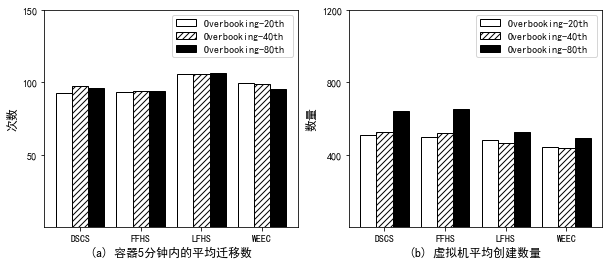

In [8]:
# average of migration
OL_80 = np.array([92.8, 93.0, 105.6, 99.2])
OL_90 = np.array([97.6, 93.7, 105.9, 98.56])
OL_100 = np.array([96, 93.6, 106.3, 95.36])
plt.figure(figsize=(10,4))
total_width, n = 0.8, 3
width = total_width / n
plt.subplot(121)
plt.bar(x, OL_80,  width=width, label='Overbooking-20th ', color='white', ls='-', ec='black')
plt.bar(x + width, OL_90, width=width, label='Overbooking-40th', tick_label = name, color='white', ls='-', ec='black', hatch='////')
plt.bar(x + 2 * width, OL_100, width=width, label='Overbooking-80th ', color='black', ls='-', ec='black')
plt.yticks([50,100,150])
plt.legend(loc='upper right')
plt.ylabel('次数', fontsize=12)
plt.xlabel('(a) 容器5分钟内的平均迁移数', fontsize=12)

# average of vm create
OL_80 = np.array([510.64, 496.45, 482.27, 439.72])
OL_90 = np.array([524.82,517.13, 465.25, 436.88])
OL_100 = np.array([638.30, 652.48, 524.82, 489.36])
total_width, n = 0.8, 3
width = total_width / n
plt.subplot(122)
plt.bar(x, OL_80,  width=width, label='Overbooking-20th ', color='white', ls='-', ec='black')
plt.bar(x + width, OL_90, width=width, label='Overbooking-40th', tick_label = name, color='white', ls='-', ec='black', hatch='////')
plt.bar(x + 2 * width, OL_100, width=width, label='Overbooking-80th', color='black', ls='-', ec='black')
plt.yticks([400, 800, 1200])
plt.legend(loc='upper right')
plt.ylabel('数量', fontsize=12)
plt.xlabel('(b) 虚拟机平均创建数量', fontsize=12)
plt.savefig('fig4_6-1', dpi=600)

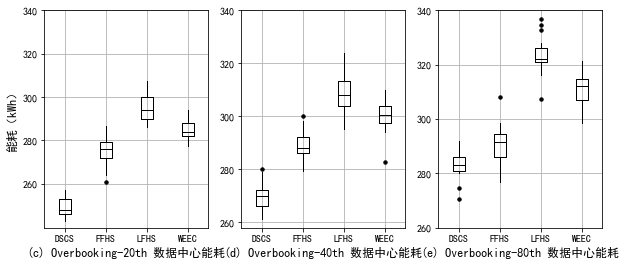

In [13]:
# 50
data1 = get_data(np.array([]), np.array([243.3333,246.0,248,253.3333,257.3333]))
data2 = get_data(np.array([260.6667,264]), np.array([269.3333,274.6667,277.3,280,286.6667]))
data3 = get_data(np.array([]), np.array([286.5333,290.6667,294,300,307.3333]))
data4 = get_data(np.array([]), np.array([277.3333,282.6667,284.6667,288,294]))
plt.figure(figsize=(10,4))
ax = plt.subplot(131)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([260, 280, 300, 320, 340])
plt.grid()
plt.ylabel('能耗（kWh）', fontsize=12)
plt.xlabel('(c) Overbooking-20th 数据中心能耗', fontsize=12)

# 60
data1 = get_data(np.array([]), np.array([261.3333,266.6667,270,272.6667,280]))
data2 = get_data(np.array([]), np.array([279.2,286,288.6667,292.6667,300]))
data3 = get_data(np.array([]), np.array([295.3333,304,308,313.3333,324]))
data4 = get_data(np.array([282.6667]), np.array([294.6667,298.6667,301.3333,304,310]))
ax = plt.subplot(132)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([260, 280, 300, 320, 340])
plt.grid()
plt.xlabel('(d) Overbooking-40th 数据中心能耗', fontsize=12)

# 70
data1 = get_data(np.array([270.6667,274.6667]), np.array([280,282.6667,284.6667,286.6667,292]))
data2 = get_data(np.array([308]), np.array([277.3333,286.6667,291.3333,294.66667,298.6667]))
data3 = get_data(np.array([307.333,332.6667,334.6667,336.6667]), np.array([316,321.2,322.6667,324.6667,328]))
data4 = get_data(np.array([]), np.array([298.6667,307.3333,312.6667,314.6667,321.3333]))
ax = plt.subplot(133)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([260, 280, 300, 320, 340])
plt.grid()
plt.xlabel('(e) Overbooking-80th 数据中心能耗', fontsize=12)

plt.savefig('fig4_6-2', dpi=600)

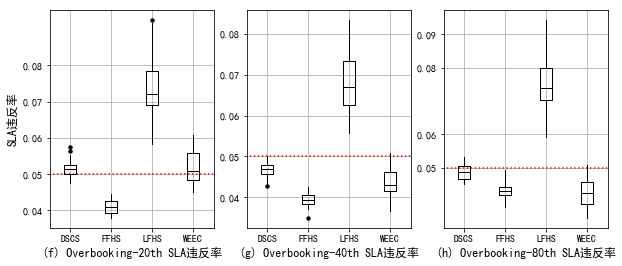

In [15]:
# 80
data1 = get_data2(np.array([0.0575]), np.array([0.0475,0.05,0.0513,0.0525,0.05625]))
data2 = get_data2(np.array([]), np.array([0.0379,0.0392,0.0408,0.0425,0.04458]))
data3 = get_data2(np.array([0.0583,0.09167,0.0925]), np.array([0.06167,0.06999,0.0721,0.07708,0.08583]))
data4 = get_data2(np.array([]), np.array([0.045,0.0483,0.05083,0.05583,0.0608]))
plt.figure(figsize=(10,4))
ax = plt.subplot(131)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.4, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([0.04, 0.05, 0.06, 0.07, 0.08])
plt.grid()
plt.hlines(0.05, 0, 5, colors = "red", linestyles = ":")
plt.ylabel('SLA违反率', fontsize=12)
plt.xlabel('(f) Overbooking-20th SLA违反率', fontsize=12)

# 90
data1 = get_data2(np.array([]), np.array([0.0429,0.0458,0.0469,0.0479,0.05]))
data2 = get_data2(np.array([0.035]), np.array([0.0371,0.03875,0.0396,0.04058,0.0425]))
data3 = get_data2(np.array([]), np.array([0.05583,0.06258,0.06708,0.07325,0.08333]))
data4 = get_data2(np.array([]), np.array([0.03667,0.04167,0.04292,0.04625,0.05083]))
ax = plt.subplot(132)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=1.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([0.04,0.05,0.06, 0.07, 0.08])
plt.grid()
plt.hlines(0.05, 0, 5, colors = "red", linestyles = ":")
plt.xlabel('(g) Overbooking-40th SLA违反率', fontsize=12)

# 100
data1 = get_data2(np.array([]), np.array([0.04508,0.04666,0.04875,0.05041,0.05308]))
data2 = get_data2(np.array([0.0492]), np.array([0.03833,0.0418,0.04292,0.04425,0.0473]))
data3 = get_data2(np.array([]), np.array([0.05916,0.07042,0.0738,0.08,0.0942]))
data4 = get_data2(np.array([]), np.array([0.035,0.0392,0.0425,0.0458,0.05083]))
ax = plt.subplot(133)
ax.boxplot([data1, data2, data3, data4], boxprops = {'color':'black'}, medianprops={'color':'black'}, widths=0.3, whis=2.3, flierprops={'markerfacecolor':'black','markersize':'3.4'}, showcaps=False)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(name)
plt.yticks([0.05,0.06,0.08,0.09])
plt.grid()
plt.hlines(0.05, 0, 5, colors = "red", linestyles = ":")
plt.xlabel('(h) Overbooking-80th SLA违反率', fontsize=12)

plt.savefig('fig4_6-3', dpi=600)